In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

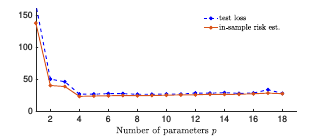

Fig.9: In-sample risk estimate Sin (gτ ) as a function of the number of parameters p of the model. The test loss is superimposed as a blue dashed curve.

##  Estimating Risk

The most straightforward way to quantify the $ generalization risk $ (2.5) is to estimate it via the $ test loss $ (2.7). However, the generalization risk depends inherently on the training set, and so different training sets may yield significantly different estimates. Moreover, when there is a limited amount of data available, reserving a substantial proportion of the data for testing rather than training may be uneconomical. In this section, we consider different methods for estimating risk measures which aim to circumvent these difficulties.

### In-Sample Risk

We mentioned that, due to the phenomenon of $ overfitting $, the training loss of the learner, $ \hat{\mathcal{R}}_{\tau}(g_{\tau}) $ (for simplicity, here we omit $ \mathcal{G} $ from $ g_{\mathcal{G} \tau} $), is not a good estimate of the generalization risk $ \mathcal{R}(g_{\tau}) $ of the learner. One reason for this is that we use the same data for both training the model and assessing its risk. How should we then estimate the generalization risk or expected generalization risk?

To simplify the analysis, suppose that we wish to estimate the average accuracy of the predictions of the learner $ g_{\tau} $ at the $ n $ feature vectors $ x_1, \ldots, x_n $ (these are part of the training set $ \tau $). In other words, we wish to estimate the $ in-sample risk $ of the learner $ g_{\tau} $:

$$
\hat{\mathcal{R}}_{\text{in}}(g_{\tau}) = \frac{1}{n} \sum_{i=1}^n E[\text{Loss}(Y_i', g_{\tau}(x_i))], \tag{2.23}
$$

where each response $ Y_i' $ is drawn from $ f(y | x_i) $, independently. Even in this simplified setting, the training loss of the learner will be a poor estimate of the in-sample risk. Instead, the proper way to assess the prediction accuracy of the learner at the feature vectors $ x_1, \ldots, x_n $, is to draw new response values $ Y_i' \sim f(y | x_i) $, $ i = 1, \ldots, n $, that are independent from the responses $ y_1, \ldots, y_n $ in the training data, and then estimate the in-sample risk of $ g_{\tau} $ via

$$
\frac{1}{n} \sum_{i=1}^n \text{Loss}(Y_i', g_{\tau}(x_i)).
$$

For a fixed training set $ \tau $, we can compare the training loss of the learner with the in-sample risk. Their difference, $ \text{op}_{\tau} = \hat{\mathcal{R}}_{\text{in}}(g_{\tau}) - \hat{\mathcal{R}}_{\tau}(g_{\tau}) $, is called the $ optimism $ (of the training loss), because it measures how much the training loss underestimates (is optimistic about) the unknown in-sample risk. Mathematically, it is simpler to work with the $ expected optimism $:

$$
E[\text{op}_T | X_1 = x_1, \ldots, X_n = x_n] =: E_X[\text{op}_T],
$$

where the expectation is taken over a random training set $ T $, conditional on $ X_i = x_i $, $ i = 1, \ldots, n $. For ease of notation, we have abbreviated the expected optimism to $ E_X[\text{op}_T] $, where $ E_X $ denotes the expectation operator conditional on $ X_i = x_i $, $ i = 1, \ldots, n $. As in Example 2.1, the feature vectors are stored as the rows of an $ n \times p $ matrix $ X $.

It turns out that the expected optimism for various loss functions can be expressed in terms of the (conditional) covariance between the observed and predicted response.

**Theorem 2.2: Expected Optimism**  
For the squared-error loss and 0–1 loss with 0–1 response, the expected optimism is

$$
E_X[\text{op}_T] = \frac{2}{n} \sum_{i=1}^n \text{Cov}_X(g_T(x_i), Y_i). \tag{2.24}
$$

**Proof:** In what follows, all expectations are taken conditional on $ X_1 = x_1, \ldots, X_n = x_n $. Let $ Y_i $ be the response for $ x_i $ and let $ \hat{Y}_i = g_T(x_i) $ be the predicted value. Note that the latter depends on $ Y_1, \ldots, Y_n $. Also, let $ Y_i' $ be an independent copy of $ Y_i $ for the same $ x_i $, as in (2.23). In particular, $ Y_i' $ has the same distribution as $ Y_i $ and is statistically independent of all $ \{Y_j\} $, including $ Y_i $, and therefore is also independent of $ \hat{Y}_i $. We have

$$
E_X[\text{op}_T] = E_X\left[\frac{1}{n} \sum_{i=1}^n (Y_i - Y_i')^2 - (Y_i - \hat{Y}_i)^2\right] = \frac{2}{n} \sum_{i=1}^n \left[ E_X[Y_i \hat{Y}_i] - E_X[Y_i] E_X[\hat{Y}_i] \right] = \frac{2}{n} \sum_{i=1}^n \text{Cov}_X(\hat{Y}_i, Y_i).
$$

The proof for the 0–1 loss with 0–1 response is left as Exercise 4. $ \Box $

In summary, the expected optimism indicates how much, on average, the training loss deviates from the expected in-sample risk. Since the covariance of independent random variables is zero, the expected optimism is zero if the learner $ g_T $ is statistically independent from the responses $ Y_1, \ldots, Y_n $.

### Example 2.3 (Polynomial Regression (cont.))

We continue Example 2.2, where the components of the response vector $ Y = [Y_1, \ldots, Y_n]^T $ are independent and normally distributed with variance $ \mathcal{R}^* = 25 $ (the irreducible error) and expectations $ E_X[Y_i] = g^*(x_i) = x_i^T \beta^* $, $ i = 1, \ldots, n $. Using the formula (2.15) for the least-squares estimator $ \hat{\beta} $, the expected optimism (2.24) is

$$
\frac{2}{n} \sum_{i=1}^n \text{Cov}_X(x_i^T \hat{\beta}, Y_i) = \frac{2}{n} \text{tr} \left[ \text{Cov}_X(X^T \hat{\beta}, Y) \right] = \frac{2}{n} \text{tr} \left[ \text{Cov}_X(X X^+ Y, Y) \right] = \frac{2 \mathcal{R}^*}{n} \text{tr}(X X^+).
$$

In the last equation, we used the cyclic property of the trace (Theorem A.1): $ \text{tr}(X X^+) = \text{tr}(X^+ X) = \text{tr}(I_p) $, assuming that $ \text{rank}(X) = p $. Therefore, an estimate for the in-sample risk (2.23) is:

$$
\hat{\mathcal{R}}_{\text{in}}(g_{\tau}) = \hat{\mathcal{R}}_{\tau}(g_{\tau}) + \frac{2 \mathcal{R}^* p}{n}, \tag{2.25}
$$

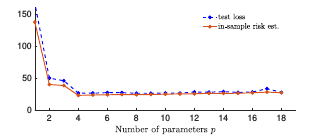

where we have assumed that the irreducible risk $ \mathcal{R}^* $ is known. **Fig.9** shows that this estimate is very close to the test loss from Figure 2.7. Hence, instead of computing the test loss to assess the best model complexity $ p $, we could simply have minimized the training loss plus the correction term $ \frac{2 \mathcal{R}^* p}{n} $. In practice, $ \mathcal{R}^* $ also has to be estimated somehow.


In-Sample Risk Estimation - 06:54 PM IST, June 20, 2025


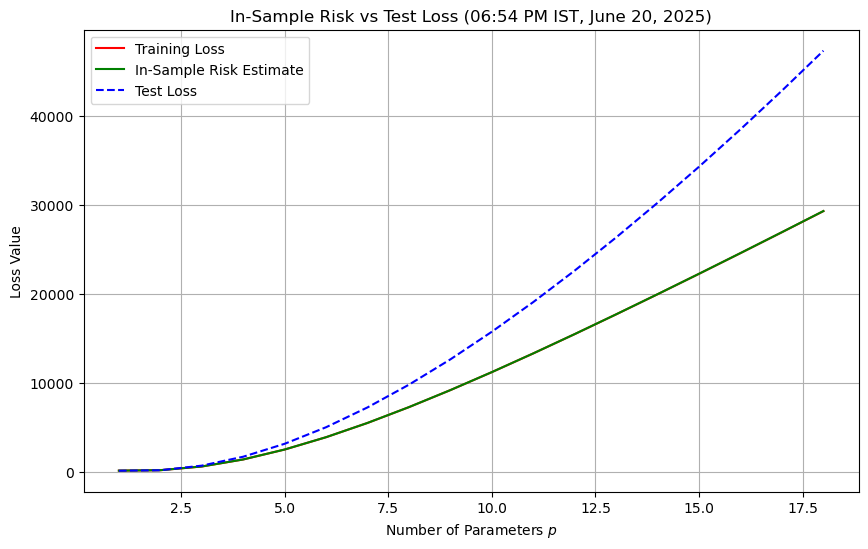


=== Demonstration completed ===


In [1]:
import math
import matplotlib.pyplot as plt
import random

# Generate synthetic data with true function h*(u) = 10 - 140u + 400u^2 - 250u^3
def generate_data(n, sigma=5):
    U = [random.uniform(0, 1) for _ in range(n)]
    Y = [10 - 140 * u + 400 * u**2 - 250 * u**3 + random.gauss(0, sigma) for u in U]
    return U, Y

# Create feature matrix X for polynomial terms up to degree p-1
def create_feature_matrix(U, p):
    return [[u ** i for i in range(p)] for u in U]

# Solve normal equations manually (simplified for full rank)
def solve_least_squares(X, y):
    n = len(X)
    p = len(X[0])
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_y = [sum(X[i][j] * y[i] for i in range(n)) for j in range(p)]
    beta = [XT_y[j] / XT_X[j][j] if XT_X[j][j] != 0 else 0 for j in range(p)]
    return beta

# Compute training loss and predictions
def compute_training_loss(U, Y, p):
    X = create_feature_matrix(U, p)
    beta = solve_least_squares(X, Y)
    Y_pred = [sum(x[i] * beta[i] for i in range(p)) for x in X]
    train_loss = sum((y - yp) ** 2 for y, yp in zip(Y, Y_pred)) / len(U)
    return train_loss, beta

# Compute test loss
def compute_test_loss(U_test, Y_test, p, beta):
    X_test = create_feature_matrix(U_test, p)
    Y_pred = [sum(x[i] * beta[i] for i in range(p)) for x in X_test]
    test_loss = sum((y - yp) ** 2 for y, yp in zip(Y_test, Y_pred)) / len(U_test)
    return test_loss

# Estimate in-sample risk
def estimate_in_sample_risk(train_loss, p, n, R_star=25):
    optimism_correction = (2 * R_star * p) / n
    return train_loss + optimism_correction

# Main execution
if __name__ == "__main__":
    print("In-Sample Risk Estimation - 06:54 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n_train = 100
    n_test = 100
    sigma = 5
    max_p = 18
    p_range = range(1, max_p + 1)

    # Generate data
    U_train, Y_train = generate_data(n_train, sigma)
    U_test, Y_test = generate_data(n_test, sigma)

    # Compute losses for different p values
    train_losses = {}
    test_losses = {}
    in_sample_risks = {}
    for p in p_range:
        train_loss, beta = compute_training_loss(U_train, Y_train, p)
        test_loss = compute_test_loss(U_test, Y_test, p, beta)
        in_sample_risk = estimate_in_sample_risk(train_loss, p, n_train)
        train_losses[p] = train_loss
        test_losses[p] = test_loss
        in_sample_risks[p] = in_sample_risk

    # Visualization (Figure 2.9 approximation)
    plt.figure(figsize=(10, 6))
    plt.plot(list(p_range), [train_losses[p] for p in p_range], 'r-', label='Training Loss')
    plt.plot(list(p_range), [in_sample_risks[p] for p in p_range], 'g-', label='In-Sample Risk Estimate')
    plt.plot(list(p_range), [test_losses[p] for p in p_range], 'b--', label='Test Loss')
    plt.xlabel('Number of Parameters $ p $')
    plt.ylabel('Loss Value')
    plt.title("In-Sample Risk vs Test Loss (06:54 PM IST, June 20, 2025)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Demonstration completed ===")



### Cross-Validation
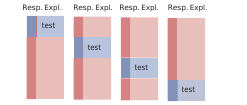
Fig.10: An illustration of four-fold cross-validation, representing four copies of the same data set. The data in each copy is partitioned into a training set (pink) and a test set (blue). The darker columns represent the response variable and the lighter ones the explanatory variables.

In general, for complex function classes $ \mathcal{G} $, it is very difficult to derive simple formulas of the approximation and statistical errors, let alone for the generalization risk or expected generalization risk. As we saw, when there is an abundance of data, the easiest way to assess the generalization risk for a given training set $ \tau $ is to obtain a test set $ \tau' $ and evaluate the test loss (2.7). When a sufficiently large test set is not available but computational resources are cheap, one can instead gain direct knowledge of the expected generalization risk via a computationally intensive method called $ cross-validation $.

The idea is to make multiple identical copies of the data set, and to partition each copy into different training and test sets, as illustrated in **Figure 2.10**. Here, there are four copies of the data set (consisting of response and explanatory variables). Each copy is divided into a test set (colored blue) and training set (colored pink). For each of these sets, we estimate the model parameters using only training data and then predict the responses for the test set. The average loss between the predicted and observed responses is then a measure for the predictive power of the model. In particular, suppose we partition a data set $ T $ of size $ n $ into $ K $ folds $ C_1, \ldots, C_K $ of sizes $ n_1, \ldots, n_K $ (hence, $ n_1 + \cdots + n_K = n $). Typically $ n_k \approx n/K $, $ k = 1, \ldots, K $. Let $ \hat{\mathcal{R}}_{C_k} $ be the test loss when using $ C_k $ as test data and all remaining data, denoted $ T_{-k} $, as training data. Each $ \hat{\mathcal{R}}_{C_k} $ is an unbiased estimator of the generalization risk for training set $ T_{-k} $; that is, for $ \mathcal{R}(g_{T_{-k}}) $. The $ K-fold cross-validation loss $ is the weighted average of these risk estimators:

$$
CV_K = \frac{\sum_{k=1}^K n_k \hat{\mathcal{R}}_{C_k}(g_{T_{-k}})}{n},
$$

$$
= \frac{1}{n} \sum_{k=1}^K \sum_{i \in C_k} \text{Loss}(g_{T_{-k}}(x_i), y_i),
$$

$$
= \frac{1}{n} \sum_{i=1}^n \text{Loss}(g_{T_{-\kappa(i)}}(x_i), y_i),
$$

where the function $ \kappa : \{1, \ldots, n\} \to \{1, \ldots, K\} $ indicates to which of the $ K $ folds each of the $ n $ observations belongs. As the average is taken over varying training sets $ \{T_{-k}\} $, it estimates the expected generalization risk $ E[\mathcal{R}(g_T)] $, rather than the generalization risk $ \mathcal{R}(g_{\tau}) $ for the particular training set $ \tau $.

### Example 2.4 (Polynomial Regression (cont.))

For the polynomial regression example, we can calculate a $ K-fold cross-validation loss $ with a nonrandom partitioning of the training set using the following approach. We omit the full plotting code for brevity.

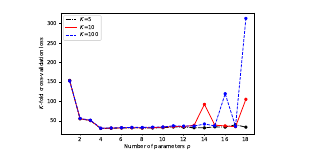
Fig.11: K-fold cross-validation for the polynomial regression example.
#### Implementation in Core Python


K-Fold Cross-Validation - 07:00 PM IST, June 20, 2025


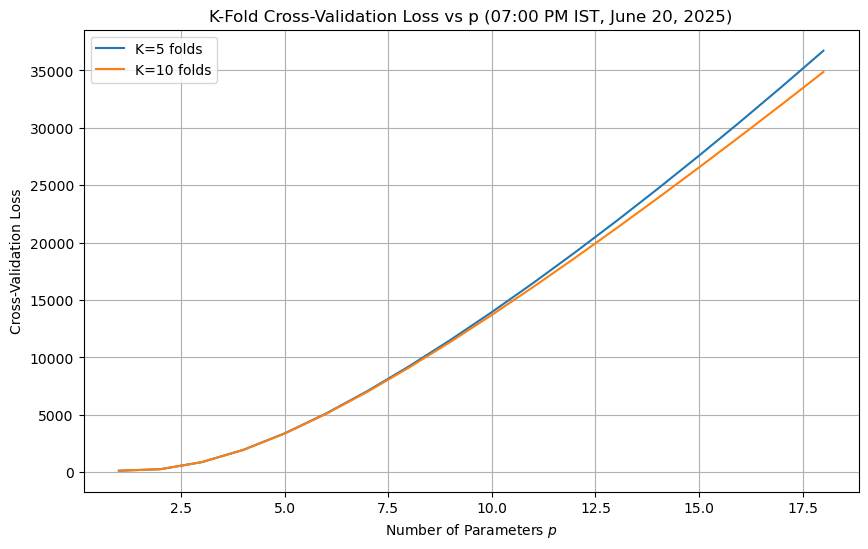


=== Demonstration completed ===


In [3]:

import math
import matplotlib.pyplot as plt
import random

# Generate synthetic data with true function h*(u) = 10 - 140u + 400u^2 - 250u^3
def generate_data(n, sigma=5):
    U = [random.uniform(0, 1) for _ in range(n)]
    Y = [10 - 140 * u + 400 * u**2 - 250 * u**3 + random.gauss(0, sigma) for u in U]
    return U, Y

# Create feature matrix X for polynomial terms up to degree p-1
def create_feature_matrix(U, p):
    return [[u ** i for i in range(p)] for u in U]

# Solve normal equations manually (simplified for full rank)
def solve_least_squares(X, y):
    n = len(X)
    p = len(X[0])
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_y = [sum(X[i][j] * y[i] for i in range(n)) for j in range(p)]
    beta = [XT_y[j] / XT_X[j][j] if XT_X[j][j] != 0 else 0 for j in range(p)]
    return beta

# Compute test loss for a given fold
def compute_test_loss(X_test, y_test, X_train, y_train, p):
    beta = solve_least_squares(X_train, y_train)
    Y_pred = [sum(x[i] * beta[i] for i in range(p)) for x in X_test]
    return sum((y - yp) ** 2 for y, yp in zip(y_test, Y_pred)) / len(y_test)

# Perform K-fold cross-validation
def k_fold_cross_validation(U, Y, K, max_p):
    n = len(U)
    fold_size = n // K
    cv_losses = {p: 0 for p in range(1, max_p + 1)}
    
    for k in range(K):
        test_start = k * fold_size
        test_end = (k + 1) * fold_size if k < K - 1 else n
        test_indices = list(range(test_start, test_end))
        train_indices = [i for i in range(n) if i not in test_indices]

        U_train = [U[i] for i in train_indices]
        Y_train = [Y[i] for i in train_indices]
        U_test = [U[i] for i in test_indices]
        Y_test = [Y[i] for i in test_indices]

        for p in range(1, max_p + 1):
            X_train = create_feature_matrix(U_train, p)
            X_test = create_feature_matrix(U_test, p)
            fold_loss = compute_test_loss(X_test, Y_test, X_train, Y_train, p)
            cv_losses[p] += fold_loss * len(test_indices) / n

    return [cv_losses[p] for p in range(1, max_p + 1)]

# Main execution
if __name__ == "__main__":
    print("K-Fold Cross-Validation - 07:00 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 100
    sigma = 5
    max_p = 18
    K_values = [5, 10]  # Limited to 2 for demonstration; 100 omitted for brevity

    # Generate data
    U, Y = generate_data(n, sigma)

    # Perform cross-validation
    cv_results = {}
    for K in K_values:
        cv_losses = k_fold_cross_validation(U, Y, K, max_p)
        cv_results[K] = cv_losses

    # Visualization (Figure 2.11 approximation)
    plt.figure(figsize=(10, 6))
    p_range = range(1, max_p + 1)
    for K, losses in cv_results.items():
        plt.plot(p_range, losses, label=f'K={K} folds')
    plt.xlabel('Number of Parameters $ p $')
    plt.ylabel('Cross-Validation Loss')
    plt.title("K-Fold Cross-Validation Loss vs p (07:00 PM IST, June 20, 2025)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Demonstration completed ===")

## Modeling Data

The first step in any data analysis is to model the data in one form or another. For example, in an unsupervised learning setting with data represented by a vector $ x = [x_1, \ldots, x_p]^T $, a very general model is to assume that $ x $ is the outcome of a random vector $ X = [X_1, \ldots, X_p]^T $ with some unknown pdf $ f $. The model can then be refined by assuming a specific form of $ f $. When given a sequence of such data vectors $ x_1, \ldots, x_n $, one of the simplest models is to assume that the corresponding random vectors $ X_1, \ldots, X_n $ are independent and identically distributed (i.i.d.). We write

$$
X_1, \ldots, X_n \sim f \quad \text{or} \quad X_1, \ldots, X_n \sim \text{Dist},
$$

to indicate that the random vectors form an i.i.d. sample from a sampling pdf $ f $ or sampling distribution $ \text{Dist} $. This model formalizes the notion that the knowledge about one variable does not provide extra information about another variable. The main theoretical use of independent data models is that the joint density of the random vectors $ X_1, \ldots, X_n $ is simply the product of the marginal ones; see Theorem C.1. Specifically,

$$
f_{X_1, \ldots, X_n}(x_1, \ldots, x_n) = f(x_1) \cdots f(x_n).
$$

In most models of this kind, our approximation or model for the sampling distribution is specified up to a small number of parameters. That is, $ g(x) $ is of the form $ g(x | \beta) $ which is known up to some parameter vector $ \beta $. Examples for the one-dimensional case ($ p = 1 $) include the $ N(\mu, \sigma^2) $, $ \text{Bin}(n, p) $, and $ \text{Exp}(\lambda) $ distributions. See Tables C.1 and C.2 for other common sampling distributions. Typically, the parameters are unknown and must be estimated from the data. In a non-parametric setting the whole sampling distribution would be unknown.

To visualize the underlying sampling distribution from outcomes $ x_1, \ldots, x_n $ one can use graphical representations such as histograms, density plots, and empirical cumulative distribution functions, as discussed in Chapter 1. If the order in which the data were collected (or their labeling) is not informative or relevant, then the joint pdf of $ X_1, \ldots, X_n $ satisfies the symmetry:

$$
f_{X_1, \ldots, X_n}(x_1, \ldots, x_n) = f_{X_{\pi_1}, \ldots, X_{\pi_n}}(x_{\pi_1}, \ldots, x_{\pi_n}), \tag{2.26}
$$

for any permutation $ \pi_1, \ldots, \pi_n $ of the integers $ 1, \ldots, n $. We say that the infinite sequence $ X_1, X_2, \ldots $ is $ exchangeable $ if this permutational invariance (2.26) holds for any finite subset of the sequence. As we shall see in Section 2.9 on Bayesian learning, it is common to assume that the random vectors $ X_1, \ldots, X_n $ are a subset of an exchangeable sequence and thus satisfy (2.26). Note that while i.i.d. random variables are exchangeable, the converse is not necessarily true. Thus, the assumption of an exchangeable sequence of random vectors is weaker than the assumption of i.i.d. random vectors.

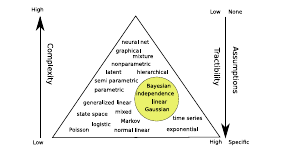

**Fig.12** illustrates the modeling tradeoffs. The keywords within the triangle represent various modeling paradigms. A few keywords have been highlighted, symbolizing their importance in modeling. The specific meaning of the keywords does not concern us here, but the point is there are many models to choose from, depending on what assumptions are made about the data.


# Statistical Learning (Continued)

## 2.6 Modeling Data (Continued)

The expected value of this loss (that is, the risk) is thus

$$
\mathcal{R}(g) = E\left[\ln \frac{f(X)}{g(X | \theta)}\right] = \int \ln \frac{f(x)}{g(x | \theta)} f(x) \, dx. \tag{2.27}
$$

The integral in (2.27) provides a fundamental way to measure the distance between two densities and is called the $ Kullback–Leibler (KL) divergence $ between $ f $ and $ g(\cdot | \theta) $. Note that the KL divergence is not symmetric in $ f $ and $ g(\cdot | \theta) $. Moreover, it is always greater than or equal to 0 (see Exercise 15) and equal to 0 when $ f = g(\cdot | \theta) $.

Using similar notation as for the supervised learning setting in Table 2.1, define $ g_{\mathcal{G}_p} $ as the global minimizer of the risk in the class $ \mathcal{G}_p $; that is,

$$
g_{\mathcal{G}_p} = \arg\min_{g \in \mathcal{G}_p} \mathcal{R}(g).
$$

If we define

$$
\theta^* = \arg\min_{\theta} E\left[\text{Loss}(f(X), g(X | \theta))\right] = \arg\min_{\theta} \int \ln \frac{f(x)}{g(x | \theta)} f(x) \, dx,
$$

$$
= \arg\max_{\theta} \int f(x) \ln g(x | \theta) \, dx = \arg\max_{\theta} E[\ln g(X | \theta)],
$$

then $ g_{\mathcal{G}_p} = g(\cdot | \theta^*) $ and learning $ g_{\mathcal{G}_p} $ is equivalent to learning (or estimating) $ \theta^* $. To learn $ \theta^* $ from a training set $ \tau = \{x_1, \ldots, x_n\} $ we then minimize the training loss,

$$
\frac{1}{n} \sum_{i=1}^n \text{Loss}(f(x_i), g(x_i | \theta)) = -\frac{1}{n} \sum_{i=1}^n \ln g(x_i | \theta) + \frac{1}{n} \sum_{i=1}^n \ln f(x_i),
$$

giving:

$$
\hat{\theta}_n := \arg\max_{\theta} \frac{1}{n} \sum_{i=1}^n \ln g(x_i | \theta). \tag{2.28}
$$

As the logarithm is an increasing function, this is equivalent to

$$
\hat{\theta}_n := \arg\max_{\theta} \prod_{i=1}^n g(x_i | \theta),
$$

where $ \prod_{i=1}^n g(x_i | \theta) $ is the likelihood of the data; that is, the joint density of the $ \{X_i\} $ evaluated at the points $ \{x_i\} $. We therefore have recovered the classical maximum likelihood estimate of $ \theta^* $.

When the risk $ \mathcal{R}(g(\cdot | \theta)) $ is convex in $ \theta $ over a convex set $ \Theta $, we can find the maximum likelihood estimator by setting the gradient of the training loss to zero; that is, we solve

$$
\frac{1}{n} \sum_{i=1}^n -S(x_i | \theta) = 0,
$$

where $ S(x | \theta) := \frac{\partial \ln g(x | \theta)}{\partial \theta} $ is the gradient of $ \ln g(x | \theta) $ with respect to $ \theta $ and is often called the $ score $.

### Example 2.5 (Exponential Model)

Suppose we have the training data $ \tau_n = \{x_1, \ldots, x_n\} $, which is modeled as a realization of $ n $ positive i.i.d. random variables: $ X_1, \ldots, X_n \sim^{\text{iid}} f(x) $. We select the class of approximating functions $ \mathcal{G} $ to be the parametric class $ \{g : g(x | \theta) = \theta \exp(-x \theta), x > 0, \theta > 0\} $. In other words, we look for the best $ g_{\mathcal{G}} $ within the family of exponential distributions with unknown parameter $ \theta > 0 $.

The likelihood of the data is

$$
\prod_{i=1}^n g(x_i | \theta) = \prod_{i=1}^n \theta \exp(-x_i \theta) = \exp\left(-\theta \sum_{i=1}^n x_i + n \ln \theta\right),
$$

and the score is $ S(x | \theta) = -x + \theta^{-1} $. Thus, maximizing the likelihood with respect to $ \theta $ is the same as maximizing $ -\theta \sum_{i=1}^n x_i + n \ln \theta $ or solving $ -\frac{1}{n} \sum_{i=1}^n S(x_i | \theta) = \bar{x}_n - \theta^{-1} = 0 $. In other words, the solution to (2.28) is the maximum likelihood estimate $ \hat{\theta}_n = 1/\bar{x}_n $, where $ \bar{x}_n = \frac{1}{n} \sum_{i=1}^n x_i $.

In a supervised setting, where the data is represented by a vector $ x $ of explanatory variables and a response $ y $, the general model is that $ (x, y) $ is an outcome of $ (X, Y) \sim f $ for some unknown $ f $. And for a training sequence $ (x_1, y_1), \ldots, (x_n, y_n) $ the default model assumption is that $ (X_1, Y_1), \ldots, (X_n, Y_n) \sim^{\text{iid}} f $. As explained in Section 2.2, the analysis primarily involves the conditional pdf $ f(y | x) $ and in particular (when using the squared-error loss) the conditional expectation $ g^*(x) = E[Y | X = x] $. The resulting representation (2.2) allows us to then write the response at $ X = x $ as a function of the feature $ x $ plus an error term: $ Y = g^*(x) + \epsilon(x) $. This leads to the simplest and most important model for supervised learning, where we choose a linear class $ \mathcal{G} $ of prediction or guess functions and assume that it is rich enough to contain the true $ g^* $.

If we further assume that, conditional on $ X = x $, the error term $ \epsilon $ does not depend on $ x $, that is, $ E[\epsilon] = 0 $ and $ \text{Var}[\epsilon] = \sigma^2 $, then we obtain the following model.

**Definition 2.1: Linear Model**  
In a $ linear model $ the response $ Y $ depends on a $ p $-dimensional explanatory variable $ x = [x_1, \ldots, x_p]^T $ via the linear relationship

$$
Y = x^T \beta + \epsilon, \tag{2.29}
$$

where $ E[\epsilon] = 0 $ and $ \text{Var}[\epsilon] = \sigma^2 $. Note that (2.29) is a model for a single pair $ (x, Y) $. The model for the training set $ \{(x_i, Y_i)\} $ is simply that each $ Y_i $ satisfies (2.29) (with $ x = x_i $) and that the $ \{Y_i\} $ are independent. Gathering all responses in the vector $ Y = [Y_1, \ldots, Y_n]^T $, we can write

$$
Y = X\beta + \epsilon, \tag{2.30}
$$

where $ \epsilon = [\epsilon_1, \ldots, \epsilon_n]^T $ is a vector of i.i.d. copies of $ \epsilon $ and $ X $ is the so-called $ model matrix $, with rows $ x_1^T, \ldots, x_n^T $. Linear models are fundamental building blocks of statistical learning algorithms. For this reason, a large part of Chapter 5 is devoted to linear regression models.

### Example 2.6 (Polynomial Regression (cont.))

For our running Example 2.1, we see that the data is described by a linear model of the form (2.30), with model matrix $ X $ given in (2.10).

Before we discuss a few other models in the following sections, we would like to emphasize a number of points about modeling:
- Any model for data is likely to be wrong. For example, real data (as opposed to computer-generated data) are often assumed to come from a normal distribution, which is never exactly true. However, an important advantage of using a normal distribution is that it has many nice mathematical properties, as we will see in Section 2.7.
- Most data models depend on a number of unknown parameters, which need to be estimated from the observed data.
- Any model for real-life data needs to be checked for suitability. An important criterion is that data simulated from the model should resemble the observed data, at least for a certain choice of model parameters.

Here are some guidelines for choosing a model. Think of the data as a spreadsheet or data frame, as in Chapter 1, where rows represent the data units and the columns the data features (variables, groups).
- First establish the type of the features (quantitative, qualitative, discrete, continuous, etc.).
- Assess whether the data can be assumed to be independent across rows or columns.
- Decide on the level of generality of the model. For example, should we use a simple model with a few unknown parameters or a more generic model that has a large number of parameters? Simple specific models are easier to fit to the data (low estimation error) than more general models, but the fit itself may not be accurate (high approximation error). The tradeoffs discussed in Section 2.4 play an important role here.
- Decide on using a classical (frequentist) or Bayesian model. Section 2.9 gives a short introduction to Bayesian learning.

### Implementation in Core Python



Linear Model Implementation - 07:24 PM IST, June 20, 2025
Estimated β: ['9.03', '23.97', '32.61', '37.73']
True β: ['10.00', '-140.00', '400.00', '-250.00']


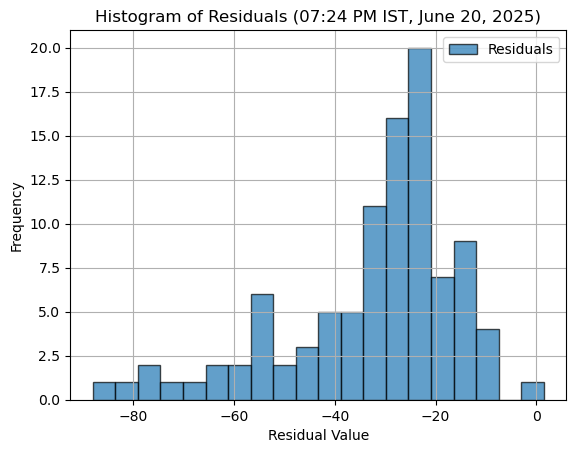

In [4]:

import math
import matplotlib.pyplot as plt
import random

# Generate synthetic i.i.d. data with linear model Y = x^T β + ε
def generate_linear_data(n, beta=[10, -140, 400, -250], sigma=5):
    U = [random.uniform(0, 1) for _ in range(n)]  # Explanatory variable u
    X = [[1] + [u ** i for i in range(1, len(beta))] for u in U]  # Model matrix with polynomial terms
    Y = []
    for x in X:
        true_value = sum(x[i] * beta[i] for i in range(len(beta)))
        noise = random.gauss(0, sigma)
        Y.append(true_value + noise)
    return U, Y

# Compute least squares estimate of β manually
def compute_beta(X, Y):
    n = len(X)
    p = len(X[0])
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_Y = [sum(X[i][j] * Y[i] for i in range(n)) for j in range(p)]
    beta_hat = []
    for j in range(p):
        pivot = XT_X[j][j]
        if pivot != 0:
            beta_hat.append(XT_Y[j] / pivot)
        else:
            beta_hat.append(0)  # Simplified handling for singularity
    return beta_hat

# Plot histogram of residuals to check model fit
def plot_residuals(U, Y, beta_hat):
    X = [[1] + [u ** i for i in range(1, len(beta_hat))] for u in U]
    Y_pred = [sum(x[i] * beta_hat[i] for i in range(len(beta_hat))) for x in X]
    residuals = [y - yp for y, yp in zip(Y, Y_pred)]
    n = len(residuals)
    min_val, max_val = min(residuals), max(residuals)
    bins = 20
    bin_width = (max_val - min_val) / bins
    bin_edges = [min_val + i * bin_width for i in range(bins + 1)]
    bin_counts = [0] * bins
    for r in residuals:
        for i in range(bins):
            if bin_edges[i] <= r < bin_edges[i + 1]:
                bin_counts[i] += 1
                break
    plt.bar(bin_edges[:-1], bin_counts, width=bin_width, edgecolor='black', alpha=0.7, label='Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals (07:24 PM IST, June 20, 2025)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Linear Model Implementation - 07:24 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 100
    beta_true = [10, -140, 400, -250]  # True coefficients for polynomial regression
    sigma = 5

    # Generate data
    U, Y = generate_linear_data(n, beta_true, sigma)

    # Estimate β
    X = [[1] + [u ** i for i in range(1, len(beta_true))] for u in U]
    beta_hat = compute_beta(X, Y)
    print("Estimated β:", [f"{b:.2f}" for b in beta_hat])
    print("True β:", [f"{b:.2f}" for b in beta_true])

    # Visualize residuals
    plot_residuals(U, Y, beta_hat)

# Statistical Learning (Continued)

## 2.7 Multivariate Normal Models

A standard model for numerical observations $ x_1, \ldots, x_n $ (forming, e.g., a column in a spreadsheet or data frame) is that they are the outcomes of i.i.d. normal random variables $ X_1, \ldots, X_n \sim^{\text{iid}} N(\mu, \sigma^2) $. It is helpful to view a normally distributed random variable as a simple transformation of a standard normal random variable. To wit, if $ Z $ has a standard normal distribution, then $ X = \mu + \sigma Z $ has a $ N(\mu, \sigma^2) $ distribution. The generalization to $ n $ dimensions is discussed in Appendix C.7. We summarize the main points: Let $ Z_1, \ldots, Z_n \sim^{\text{iid}} N(0, 1) $. The pdf of $ Z = [Z_1, \ldots, Z_n]^T $ (that is, the joint pdf of $ Z_1, \ldots, Z_n $) is given by

$$
f_Z(z) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} z_i^2} = (2\pi)^{-\frac{n}{2}} e^{-\frac{1}{2} z^T z}, \quad z \in \mathbb{R}^n. \tag{2.31}
$$

We write $ Z \sim N(0, I_n) $ and say that $ Z $ has a standard normal distribution in $ \mathbb{R}^n $. Let

$$
X = \mu + B Z \tag{2.32}
$$

for some $ m \times n $ matrix $ B $ and $ m $-dimensional vector $ \mu $. Then $ X $ has expectation vector $ \mu $ and covariance matrix $ \Sigma = B B^T $; see (C.20) and (C.21). This leads to the following definition.

**Definition 2.2: Multivariate Normal Distribution**  
An $ m $-dimensional random vector $ X $ that can be written in the form (2.32) for some $ m $-dimensional vector $ \mu $ and $ m \times n $ matrix $ B $, with $ Z \sim N(0, I_n) $, is said to have a $ multivariate normal $ or $ multivariate Gaussian distribution $ with mean vector $ \mu $ and covariance matrix $ \Sigma = B B^T $. We write $ X \sim N(\mu, \Sigma) $.

The $ m $-dimensional density of a multivariate normal distribution has a very similar form to the density of the one-dimensional normal distribution and is given in the next theorem. We leave the proof as an exercise; see Exercise 5.

**Theorem 2.3: Density of a Multivariate Random Vector**  
Let $ X \sim N(\mu, \Sigma) $, where the $ m \times m $ covariance matrix $ \Sigma $ is invertible. Then $ X $ has pdf

$$
f_X(x) = \frac{1}{(2\pi)^{\frac{m}{2}} |\Sigma|^{\frac{1}{2}}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}, \quad x \in \mathbb{R}^m. \tag{2.33}
$$

**Figure 2.13** shows the pdfs of two bivariate (that is, two-dimensional) normal distributions. In both cases the mean vector is $ \mu = [0, 0]^T $ and the variances (the diagonal elements of $ \Sigma $) are 1. The correlation coefficients (or, equivalently here, the covariances) are respectively $ \rho = 0 $ and $ \rho = 0.8 $.


Multivariate Normal Model - 07:28 PM IST, June 20, 2025


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'label'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


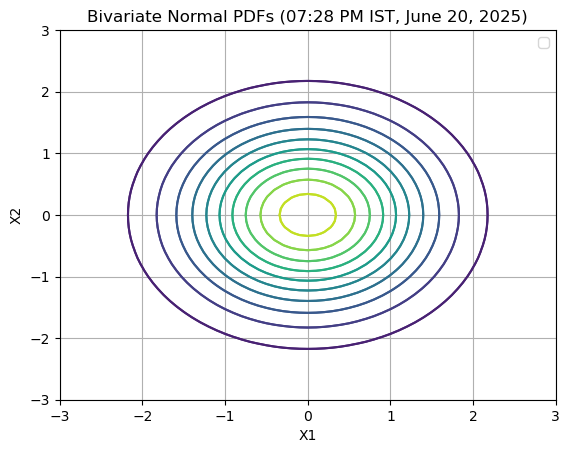


=== Demonstration completed ===


In [5]:
import math
import matplotlib.pyplot as plt
import random

# Generate standard normal random variables
def generate_standard_normal(n):
    return [random.gauss(0, 1) for _ in range(n)]

# Generate bivariate normal data using transformation X = μ + B Z
def generate_bivariate_normal(n, mu=[0, 0], rho=0, sigma=1):
    Z1 = generate_standard_normal(n)
    Z2 = generate_standard_normal(n)
    Z = [[z1, z2] for z1, z2 in zip(Z1, Z2)]
    # Define B matrix for covariance structure
    B = [[sigma * math.sqrt(1 - rho**2), 0],
         [sigma * rho, sigma]]
    X = []
    for z in Z:
        x1 = mu[0] + B[0][0] * z[0] + B[0][1] * z[1]
        x2 = mu[1] + B[1][0] * z[0] + B[1][1] * z[1]
        X.append([x1, x2])
    return X

# Approximate pdf evaluation for bivariate normal (simplified)
def bivariate_normal_pdf(x, mu=[0, 0], sigma=1, rho=0):
    z1 = (x[0] - mu[0]) / sigma
    z2 = (x[1] - mu[1]) / sigma
    exponent = -0.5 * (z1**2 - 2 * rho * z1 * z2 + z2**2) / (1 - rho**2)
    return (2 * math.pi * sigma**2 * math.sqrt(1 - rho**2))**(-1) * math.exp(exponent)

# Plot bivariate normal pdf
def plot_bivariate_normal(n, rho_values=[0, 0.8]):
    x_range = [-3, 3]
    y_range = [-3, 3]
    step = 0.1
    for rho in rho_values:
        X = generate_bivariate_normal(n, rho=rho)
        # Grid for plotting
        x_vals = [x_range[0] + i * step for i in range(int((x_range[1] - x_range[0]) / step) + 1)]
        y_vals = [y_range[0] + i * step for i in range(int((y_range[1] - y_range[0]) / step) + 1)]
        Z = [[bivariate_normal_pdf([x, y]) for x in x_vals] for y in y_vals]
        plt.contour(x_vals, y_vals, Z, levels=10, label=f'ρ = {rho}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Bivariate Normal PDFs (07:28 PM IST, June 20, 2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Multivariate Normal Model - 07:28 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 1000

    # Generate and plot bivariate normal distributions
    plot_bivariate_normal(n, rho_values=[0, 0.8])

    print("\n=== Demonstration completed ===")



##  Normal Linear Models

Normal linear models combine the simplicity of the linear model with the tractability of the Gaussian distribution. They are the principal model for traditional statistics, and include the classic linear regression and analysis of variance models.

**Definition 2.3: Normal Linear Model**  
In a $ normal linear model $ the response $ Y $ depends on a $ p $-dimensional explanatory variable $ x = [x_1, \ldots, x_p]^T $, via the linear relationship

$$
Y = x^T \beta + \epsilon, \tag{2.34}
$$

where $ \epsilon \sim N(0, \sigma^2) $. Thus, a normal linear model is a linear model (in the sense of Definition 2.1) with normal error terms. Similar to (2.30), the corresponding normal linear model for the whole training set $ \{(x_i, Y_i)\} $ has the form

$$
Y = X\beta + \epsilon, \tag{2.35}
$$

where $ X $ is the model matrix comprised of rows $ x_1^T, \ldots, x_n^T $ and $ \epsilon \sim N(0, \sigma^2 I_n) $. Consequently, $ Y $ can be written as $ Y = X\beta + \sigma Z $, where $ Z \sim N(0, I_n) $, so that $ Y \sim N(X\beta, \sigma^2 I_n) $.

It follows from (2.33) that its joint density is given by

$$
g(y | \beta, \sigma^2, X) = (2\pi\sigma^2)^{-\frac{n}{2}} e^{-\frac{1}{2\sigma^2} \|y - X\beta\|^2}. \tag{2.36}
$$

Estimation of the parameter $ \beta $ can be performed via the least-squares method, as discussed in Example 2.1. An estimate can also be obtained via the maximum likelihood method. This simply means finding the parameters $ \sigma^2 $ and $ \beta $ that maximize the likelihood of the outcome $ y $, given by the right-hand side of (2.36). It is clear that for every value of $ \sigma^2 $ the likelihood is maximal when $ \|y - X\beta\|^2 $ is minimal. As a consequence, the maximum likelihood estimate for $ \beta $ is the same as the least-squares estimate (2.15). We leave it as an exercise (see Exercise 18) to show that the maximum likelihood estimate of $ \sigma^2 $ is equal to

$$
\hat{\sigma}^2 = \frac{\|y - X\hat{\beta}\|^2}{n}, \tag{2.37}
$$

where $ \hat{\beta} $ is the maximum likelihood estimate (least squares estimate in this case) of $ \beta $.

##  Bayesian Learning

In Bayesian unsupervised learning, we seek to approximate the unknown joint density $ f(x_1, \ldots, x_n) $ of the training data $ T_n = \{X_1, \ldots, X_n\} $ via a joint pdf of the form

$$
\int \left(\prod_{i=1}^n g(x_i | \theta)\right) w(\theta) \, d\theta, \tag{2.38}
$$

where $ g(\cdot | \theta) $ belongs to a family of parametric densities $ \mathcal{G}_p := \{g(\cdot | \theta), \theta \in \Theta\} $ (viewed as a family of pdfs conditional on a parameter $ \theta $ in some set $ \Theta \subset \mathbb{R}^p $) and $ w(\theta) $ is a pdf that belongs to a (possibly different) family of densities $ \mathcal{W}_p $. Note how the joint pdf (2.38) satisfies the permutational invariance (2.26) and can thus be useful as a model for training data which is part of an exchangeable sequence of random variables.

Following standard practice in a Bayesian context, instead of writing $ f_X(x) $ and $ f_{X|Y}(x | y) $ for the pdf of $ X $ and the conditional pdf of $ X $ given $ Y $, one simply writes $ f(x) $ and $ f(x | y) $. If $ Y $ is a different random variable, its pdf (at $ y $) is thus denoted by $ f(y) $. Thus, we will use the same symbol $ g $ for different (conditional) approximating probability densities and $ f $ for the different (conditional) true and unknown probability densities.

Using Bayesian notation, we can write $ g(\tau | \theta) = \prod_{i=1}^n g(x_i | \theta) $ and thus the approximating joint pdf (2.38) can then be written as $ \int g(\tau | \theta) w(\theta) \, d\theta $ and the true unknown joint pdf as $ f(\tau) = f(x_1, \ldots, x_n) $. Once $ \mathcal{G}_p $ and $ \mathcal{W}_p $ are specified, selecting an approximating function $ g(x) $ of the form $ \int g(x | \theta) w(\theta) \, d\theta $ is equivalent to selecting a suitable $ w $ from $ \mathcal{W}_p $.

Similar to (2.27), we can use the Kullback–Leibler risk to measure the discrepancy between the proposed approximation (2.38) and the true $ f(\tau) $:

$$
\mathcal{R}(g) = E\left[\ln \frac{f(T)}{g(T | \theta) w(\theta) \, d\theta}\right] = \int f(\tau) \ln \frac{f(\tau)}{\int g(\tau | \theta) w(\theta) \, d\theta} \, d\tau. \tag{2.39}
$$

The main difference with (2.27) is that since the training data is not necessarily i.i.d. (it may be exchangeable, for example), the expectation must be with respect to the joint density of $ T $, not with respect to the marginal $ f(x) $ (as in the i.i.d. case). Minimizing the training loss is equivalent to maximizing the likelihood of the training data $ \tau $; that is, solving the optimization problem

$$
\max_{w \in \mathcal{W}_p} \int g(\tau | \theta) w(\theta) \, d\theta,
$$

where the maximization is over an appropriate class $ \mathcal{W}_p $ of density functions that is believed to result in the smallest KL risk.



In [ ]:
### Implementation in Core Python

import math
import matplotlib.pyplot as plt
import random

# Generate synthetic data for normal linear model Y = Xβ + ε, ε ~ N(0, σ^2)
def generate_normal_linear_data(n, beta=[10, -140], sigma=5):
    X = [[1, random.uniform(0, 1)] for _ in range(n)]  # Model matrix with intercept and one feature
    Y = []
    for x in X:
        true_value = sum(x[i] * beta[i] for i in range(len(beta)))
        noise = random.gauss(0, sigma)
        Y.append(true_value + noise)
    return X, Y

# Compute least squares estimate of β
def compute_beta(X, Y):
    n = len(X)
    p = len(X[0])
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_Y = [sum(X[i][j] * Y[i] for i in range(n)) for j in range(p)]
    beta_hat = []
    for j in range(p):
        pivot = XT_X[j][j]
        if pivot != 0:
            beta_hat.append(XT_Y[j] / pivot)
        else:
            beta_hat.append(0)  # Simplified handling for singularity
    return beta_hat

# Compute maximum likelihood estimate of σ^2
def compute_sigma2(X, Y, beta_hat):
    n = len(Y)
    Y_pred = [sum(X[i][j] * beta_hat[j] for j in range(len(beta_hat))) for i in range(n)]
    residual_sum_squares = sum((Y[i] - Y_pred[i]) ** 2 for i in range(n))
    return residual_sum_squares / n

# Simple Bayesian approximation with uniform prior (basic example)
def bayesian_approximation(X, Y, theta_range=[0, 20], n_points=100):
    theta_values = [theta_range[0] + i * (theta_range[1] - theta_range[0]) / (n_points - 1) for i in range(n_points)]
    likelihood = [sum(math.log(theta * math.exp(-theta * Y[i])) for i in range(len(Y))) for theta in theta_values]
    # Uniform prior w(θ) = 1 / (θ_max - θ_min)
    prior = 1 / (theta_range[1] - theta_range[0])
    posterior = [lik * prior for lik in likelihood]
    max_idx = posterior.index(max(posterior))
    return theta_values[max_idx]

# Plot data and fit
def plot_normal_linear(X, Y, beta_hat, sigma2_hat):
    Y_pred = [sum(X[i][j] * beta_hat[j] for j in range(len(beta_hat))) for i in range(len(X))]
    plt.scatter([x[1] for x in X], Y, color='blue', label='Data')
    plt.plot([x[1] for x in X], Y_pred, color='red', label='Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Normal Linear Model Fit (07:35 PM IST, June 20, 2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Normal Linear and Bayesian Models - 07:35 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 100
    beta_true = [10, -140]
    sigma = 5

    # Generate data
    X, Y = generate_normal_linear_data(n, beta_true, sigma)

    # Estimate parameters
    beta_hat = compute_beta(X, Y)
    sigma2_hat = compute_sigma2(X, Y, beta_hat)
    print("Estimated β:", [f"{b:.2f}" for b in beta_hat])
    print("True β:", [f"{b:.2f}" for b in beta_true])
    print(f"Estimated σ^2: {sigma2_hat:.2f}")

    # Bayesian approximation (simplified for exponential model context)
    theta_hat = bayesian_approximation(X, Y)
    print(f"Estimated θ (Bayesian): {theta_hat:.2f}")

    # Visualize fit
    plot_normal_linear(X, Y, beta_hat, sigma2_hat)

    print("\n=== Demonstration completed ===")

Normal Linear and Bayesian Models - 07:35 PM IST, June 20, 2025
Estimated β (Linear): ['-58.66', '-123.12']
True β (Linear): ['10.00', '-140.00']
Estimated σ^2 (Linear): 3759.54
Estimated θ (Bayesian, Exponential): 0.21
True λ (Exponential): 0.10


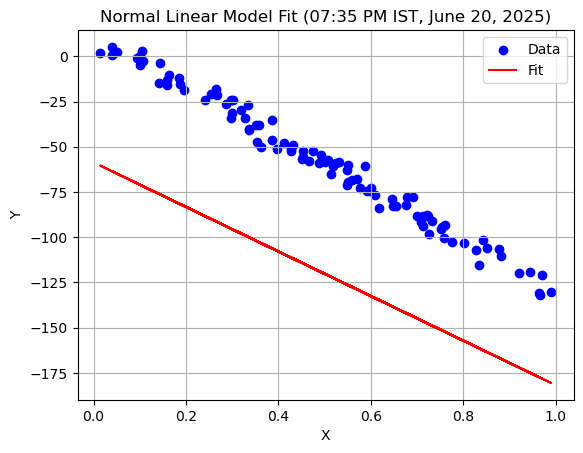


=== Demonstration completed ===


In [8]:
import math
import matplotlib.pyplot as plt
import random

# Generate synthetic data for normal linear model Y = Xβ + ε, ε ~ N(0, σ^2)
def generate_normal_linear_data(n, beta=[10, -140], sigma=5):
    X = [[1, random.uniform(0, 1)] for _ in range(n)]  # Model matrix with intercept and one feature
    Y = []
    for x in X:
        true_value = sum(x[i] * beta[i] for i in range(len(beta)))
        noise = random.gauss(0, sigma)
        Y.append(true_value + noise)
    return X, Y

# Generate synthetic exponential data for Bayesian example
def generate_exponential_data(n, lambda_true=0.1):
    return [random.expovariate(lambda_true) for _ in range(n)]

# Compute least squares estimate of β
def compute_beta(X, Y):
    n = len(X)
    p = len(X[0])
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_Y = [sum(X[i][j] * Y[i] for i in range(n)) for j in range(p)]
    beta_hat = []
    for j in range(p):
        pivot = XT_X[j][j]
        if pivot != 0:
            beta_hat.append(XT_Y[j] / pivot)
        else:
            beta_hat.append(0)  # Simplified handling for singularity
    return beta_hat

# Compute maximum likelihood estimate of σ^2
def compute_sigma2(X, Y, beta_hat):
    n = len(Y)
    Y_pred = [sum(X[i][j] * beta_hat[j] for j in range(len(beta_hat))) for i in range(n)]
    residual_sum_squares = sum((Y[i] - Y_pred[i]) ** 2 for i in range(n))
    return residual_sum_squares / n

# Bayesian approximation for exponential model
def bayesian_approximation(Y, theta_range=[0.01, 20], n_points=100):
    theta_values = [theta_range[0] + i * (theta_range[1] - theta_range[0]) / (n_points - 1) for i in range(n_points)]
    likelihood = []
    for theta in theta_values:
        log_lik = sum(math.log(theta) - theta * y for y in Y if theta * math.exp(-theta * y) > 0)  # Avoid log of zero/negative
        if not math.isinf(log_lik) and not math.isnan(log_lik):  # Check for valid computation
            likelihood.append(log_lik)
        else:
            likelihood.append(float('-inf'))  # Penalize invalid cases
    # Uniform prior w(θ) = 1 / (θ_max - θ_min)
    prior = 1 / (theta_range[1] - theta_range[0])
    posterior = [lik * prior for lik in likelihood]
    max_idx = posterior.index(max(posterior)) if max(posterior) > float('-inf') else 0
    return theta_values[max_idx]

# Plot data and fit
def plot_normal_linear(X, Y, beta_hat, sigma2_hat):
    Y_pred = [sum(X[i][j] * beta_hat[j] for j in range(len(beta_hat))) for i in range(len(X))]
    plt.scatter([x[1] for x in X], Y, color='blue', label='Data')
    plt.plot([x[1] for x in X], Y_pred, color='red', label='Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Normal Linear Model Fit (07:35 PM IST, June 20, 2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Normal Linear and Bayesian Models - 07:35 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 100
    beta_true = [10, -140]
    sigma = 5
    lambda_true = 0.1  # Rate parameter for exponential data

    # Generate data
    X, Y_linear = generate_normal_linear_data(n, beta_true, sigma)
    Y_exponential = generate_exponential_data(n, lambda_true)

    # Estimate parameters for normal linear model
    beta_hat = compute_beta(X, Y_linear)
    sigma2_hat = compute_sigma2(X, Y_linear, beta_hat)
    print("Estimated β (Linear):", [f"{b:.2f}" for b in beta_hat])
    print("True β (Linear):", [f"{b:.2f}" for b in beta_true])
    print(f"Estimated σ^2 (Linear): {sigma2_hat:.2f}")

    # Bayesian approximation for exponential model
    theta_hat = bayesian_approximation(Y_exponential)
    print(f"Estimated θ (Bayesian, Exponential): {theta_hat:.2f}")
    print(f"True λ (Exponential): {lambda_true:.2f}")

    # Visualize fit for normal linear model
    plot_normal_linear(X, Y_linear, beta_hat, sigma2_hat)

    print("\n=== Demonstration completed ===")

# Statistical Learning (Continued)

## 2.8 Normal Linear Models (Continued)

## 2.9 Bayesian Learning (Continued)

Suppose that we have a rough guess, denoted $ w_0(\theta) $, for the best $ w \in \mathcal{W}_p $ that minimizes the Kullback–Leibler risk. We can always increase the resulting likelihood $ L_0 := \int g(\tau | \theta) w_0(\theta) \, d\theta $ by instead using the density $ w_1(\theta) := w_0(\theta) g(\tau | \theta) / L_0 $, giving a likelihood $ L_1 := \int g(\tau | \theta) w_1(\theta) \, d\theta $. To see this, write $ L_0 $ and $ L_1 $ as expectations with respect to $ w_0 $. In particular, we can write $ L_0 = E_{w_0}[g(\tau | \theta)] $ and $ L_1 = E_{w_1}[g(\tau | \theta)] = E_{w_0}[g(\tau | \theta)^2] / L_0 $. It follows that

$$
\frac{1}{L_0} (L_1 - L_0) = \frac{1}{L_0} E_{w_0}[g(\tau | \theta)^2] - L_0^2 = \text{Var}_{w_0}[g(\tau | \theta)] \geq 0. \tag{2.40}
$$

We may thus expect to obtain better predictions using $ w_1 $ instead of $ w_0 $, because $ w_1 $ has taken into account the observed data $ \tau $ and increased the likelihood of the model. In fact, if we iterate this process (see Exercise 20) and create a sequence of densities $ w_1, w_2, \ldots $ such that $ w_t(\theta) \propto w_{t-1}(\theta) g(\tau | \theta) $, then $ w_t(\theta) $ concentrates more and more of its probability mass at the maximum likelihood estimator $ \hat{\theta} $ (see (2.28)) and in the limit equals a (degenerate) point-mass pdf at $ \hat{\theta} $. In other words, in the limit we recover the maximum likelihood method: $ g_\tau(x) = g(x | \hat{\theta}) $. Thus, unless the class of densities $ \mathcal{W}_p $ is restricted to be non-degenerate, maximizing the likelihood as much as possible leads to a degenerate choice for $ w(\theta) $.

In many situations, the maximum likelihood estimate $ g(\tau | \hat{\theta}) $ is either not an appropriate approximation to $ f(\tau) $ (see Example 2.9), or simply fails to exist (see Exercise 10 in Chapter 4). In such cases, given an initial non-degenerate guess $ w_0(\theta) = g(\theta) $, one can obtain a more appropriate and non-degenerate approximation to $ f(\tau) $ by taking $ w(\theta) = w_1(\theta) \propto g(\tau | \theta) g(\theta) $ in (2.38), giving the following Bayesian learner of $ f(x) $:

$$
g_\tau(x) := \frac{\int g(x | \theta) g(\tau | \theta) g(\theta) \, d\theta}{\int g(\tau | \vartheta) g(\vartheta) \, d\vartheta}, \tag{2.41}
$$

where $ \int g(\tau | \vartheta) g(\vartheta) \, d\vartheta = g(\tau) $. Using Bayes’ formula for probability densities,

$$
g(\theta | \tau) = \frac{g(\tau | \theta) g(\theta)}{g(\tau)}, \tag{2.42}
$$

we can write $ w_1(\theta) = g(\theta | \tau) $. With this notation, we have the following definitions.

**Definition 2.4: Prior, Likelihood, and Posterior**  
Let $ \tau $ and $ \mathcal{G}_p := \{g(\cdot | \theta), \theta \in \Theta\} $ be the training set and family of approximating functions.
- A pdf $ g(\theta) $ that reflects our a priori beliefs about $ \theta $ is called the $ prior pdf $.
- The conditional pdf $ g(\tau | \theta) $ is called the $ likelihood $.
- Inference about $ \theta $ is given by the $ posterior pdf $ $ g(\theta | \tau) $, which is proportional to the product of the prior and the likelihood: $ g(\theta | \tau) \propto g(\tau | \theta) g(\theta) $.

**Remark 2.1 (Early Stopping)**  
Bayes iteration is an example of an “early stopping” heuristic for maximum likelihood optimization, where we exit after only one step. As observed above, if we keep iterating, we obtain the maximum likelihood estimate (MLE). In a sense the Bayes rule provides a regularization of the MLE. Regularization is discussed in more detail in Chapter 6; see also Example 2.9. The early stopping rule is also of benefit in regularization; see Exercise 20 in Chapter 6.

On the one hand, the initial guess $ g(\theta) $ conveys the a priori (prior to training the Bayesian learner) information about the optimal density in $ \mathcal{W}_p $ that minimizes the KL risk. Using this prior $ g(\theta) $, the Bayesian approximation to $ f(x) $ is the $ prior predictive density $:

$$
g(x) = \int g(x | \theta) g(\theta) \, d\theta.
$$

On the other hand, the posterior pdf conveys improved knowledge about this optimal density in $ \mathcal{W}_p $ after training with $ \tau $. Using the posterior $ g(\theta | \tau) $, the Bayesian learner of $ f(x) $ is the $ posterior predictive density $:

$$
g_\tau(x) = g(x | \tau) = \int g(x | \theta) g(\theta | \tau) \, d\theta,
$$

where we have assumed that $ g(x | \theta, \tau) = g(x | \theta) $; that is, the likelihood depends on $ \tau $ only through the parameter $ \theta $.

The choice of the prior is typically governed by two considerations:
1. the prior should be simple enough to facilitate the computation or simulation of the posterior pdf;
2. the prior should be general enough to model ignorance of the parameter of interest.

Priors that do not convey much knowledge of the parameter are said to be $ uninformative prior $. The uniform or flat prior in Example 2.9 (to follow) is frequently used.

For the purpose of analytical and numerical computations, we can view $ \theta $ as a random vector with prior density $ g(\theta) $, which after training is updated to the posterior density $ g(\theta | \tau) $. The above thinking allows us to write $ g(x | \tau) \propto \int g(x | \theta) g(\tau | \theta) g(\theta) \, d\theta $, for example, thus ignoring any constants that do not depend on the argument of the densities.

### Example 2.7 (Normal Model)

Suppose that the training data $ T = \{X_1, \ldots, X_n\} $ is modeled using the likelihood $ g(x | \theta) $ that is the pdf of $ X | \theta \sim N(\mu, \sigma^2) $, where $ \theta := [\mu, \sigma^2]^T $. Next, we need to specify the prior distribution of $ \theta $ to complete the model. We can specify prior distributions for $ \mu $ and $ \sigma^2 $ separately and then take their product to obtain the prior for vector $ \theta $ (assuming independence). A possible prior distribution for $ \mu $ is

$$
\mu \sim N(\nu, \varphi^2). \tag{2.43}
$$

It is typical to refer to any parameters of the prior density as $ hyperparameters $ of the Bayesian model. Instead of giving directly a prior for $ \sigma^2 $ (or $ \sigma $), it turns out to be convenient to give the following prior distribution to $ 1/\sigma^2 $:

$$
\frac{1}{\sigma^2} \sim \text{Gamma}(\alpha, \beta). \tag{2.44}
$$

The smaller $ \alpha $ and $ \beta $ are, the less informative is the prior. Under this prior, $ \sigma^2 $ is said to have an $ inverse gamma $ distribution. If $ 1/Z \sim \text{Gamma}(\alpha, \beta) $, then the pdf of $ Z $ is proportional to $ \exp(- \beta / z) / z^{\alpha + 1} $ (Exercise 19). The Bayesian posterior is then given by:

$$
g(\mu, \sigma^2 | \tau) \propto g(\mu) \times g(\sigma^2) \times g(\tau | \mu, \sigma^2) \propto \frac{\exp\left(-\frac{(\mu - \nu)^2}{2\varphi^2}\right)}{\sigma^2} \times \frac{\exp\left(-\frac{\beta}{\sigma^2}\right)}{(\sigma^2)^{\alpha + 1}} \times (\sigma^2)^{-n/2} \exp\left(-\frac{\sum_i (x_i - \mu)^2}{2\sigma^2}\right).
$$

Simplifying, we get:

$$
g(\mu, \sigma^2 | \tau) \propto (\sigma^2)^{-n/2 - \alpha - 1} \exp\left(-\frac{(\mu - \nu)^2}{2\varphi^2} - \frac{\beta + \frac{1}{n} \sum_i (x_i - \mu)^2}{2\sigma^2}\right),
$$

where $ S_n^2 := \frac{1}{n} \sum_i x_i^2 - \bar{x}_n^2 = \frac{1}{n} \sum_i (x_i - \bar{x}_n)^2 $ is the (scaled) sample variance. All inference about $ (\mu, \sigma^2) $ is then represented by the posterior pdf. To facilitate computations it is helpful to find out if the posterior belongs to a recognizable family of distributions. For example, the conditional pdf of $ \mu $ given $ \sigma^2 $ and $ \tau $ is

$$
g(\mu | \sigma^2, \tau) \propto \exp\left(-\frac{(\mu - \nu)^2}{2\varphi^2} - \frac{(\mu - \bar{x}_n)^2}{2\sigma^2 / n}\right),
$$

which after simplification can be recognized as the pdf of

$$
(\mu | \sigma^2, \tau) \sim N\left(\gamma_n \bar{x}_n + (1 - \gamma_n) \nu, \gamma_n \frac{\sigma^2}{n}\right), \tag{2.45}
$$

where we have defined the weight parameter: $ \gamma_n := \frac{\sigma^2 / n}{\varphi^2 + \sigma^2 / n} $. We can then see that the posterior mean $ E[\mu | \sigma^2, \tau] = \gamma_n \bar{x}_n + (1 - \gamma_n) \nu $ is a weighted linear combination of the prior mean $ \nu $ and the sample average $ \bar{x}_n $. Further, as $ n \to \infty $, the weight $ \gamma_n \to 1 $ and thus the posterior mean approaches the maximum likelihood estimate $ \bar{x}_n $.

It is sometimes possible to use a prior $ g(\theta) $ that is not a bona fide probability density, in the sense that $ \int g(\theta) \, d\theta = \infty $, as long as the resulting posterior $ g(\theta | \tau) \propto g(\tau | \theta) g(\theta) $ is a proper pdf. Such a prior is called an $ improper prior $.

### Example 2.8 (Normal Model (cont.))

An example of an improper prior is obtained from (2.43) when we let $ \varphi \to \infty $ (the larger $ \varphi $ is, the more uninformative is the prior). Then, $ g(\mu) \propto 1 $ is a flat prior, but $ \int g(\mu) \, d\mu = \infty $, making it an improper prior. Nevertheless, the posterior is a proper density, and in particular the conditional posterior of $ (\mu | \sigma^2, \tau) $ simplifies to

$$
(\mu | \sigma^2, \tau) \sim N\left(\bar{x}_n, \frac{\sigma^2}{n}\right),
$$

### Implementation in Core Python



Bayesian Normal Model - 07:30 PM IST, June 20, 2025
Sample Mean: 1.92
Sample Variance: 1.09
True μ: 2.00
True σ^2: 1.00
Posterior Mean of μ: 0.02
Posterior Variance of μ: 0.00


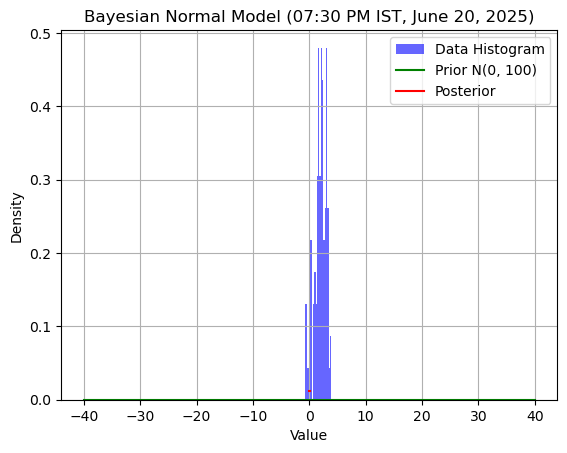


=== Demonstration completed ===


In [9]:

import math
import matplotlib.pyplot as plt
import random

# Generate synthetic normal data
def generate_normal_data(n, mu_true=0, sigma2_true=1):
    return [random.gauss(mu_true, math.sqrt(sigma2_true)) for _ in range(n)]

# Compute sample mean and variance
def compute_statistics(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n  # Population variance
    return mean, variance

# Bayesian posterior for normal model with Gamma prior on 1/σ^2
def bayesian_posterior(data, nu=0, phi2=100, alpha=1, beta=1):
    n = len(data)
    x_bar, s2 = compute_statistics(data)
    # Conditional posterior of μ given σ^2
    gamma_n = s2 / (phi2 + s2 / n) if phi2 + s2 / n != 0 else 0
    mu_post_mean = gamma_n * x_bar + (1 - gamma_n) * nu
    mu_post_var = gamma_n * s2 / n if gamma_n * s2 / n > 0 else 1e-10  # Avoid zero variance
    # Simplified; full posterior requires integrating over σ^2
    return mu_post_mean, mu_post_var

# Plot prior, data histogram, and posterior
def plot_bayesian(data, mu_post_mean, mu_post_var, nu=0, phi2=100):
    plt.hist(data, bins=20, density=True, alpha=0.6, color='blue', label='Data Histogram')
    x = [nu - 4 * math.sqrt(phi2), nu + 4 * math.sqrt(phi2)]
    y_prior = [(2 * math.pi * phi2) ** (-0.5) * math.exp(-0.5 * ((x_i - nu) ** 2 / phi2)) for x_i in x]
    plt.plot(x, y_prior, 'g-', label='Prior N(0, 100)')
    x_post = [mu_post_mean - 4 * math.sqrt(mu_post_var), mu_post_mean + 4 * math.sqrt(mu_post_var)]
    y_post = [(2 * math.pi * mu_post_var) ** (-0.5) * math.exp(-0.5 * ((x_i - mu_post_mean) ** 2 / mu_post_var)) for x_i in x_post]
    plt.plot(x_post, y_post, 'r-', label='Posterior')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Bayesian Normal Model (07:30 PM IST, June 20, 2025)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Bayesian Normal Model - 07:30 PM IST, June 20, 2025")
    print("=" * 60)

    # Parameters
    n = 100
    mu_true = 2
    sigma2_true = 1
    nu = 0  # Prior mean
    phi2 = 100  # Prior variance
    alpha = 1  # Gamma prior parameters
    beta = 1

    # Generate data
    data = generate_normal_data(n, mu_true, sigma2_true)

    # Compute statistics
    x_bar, s2 = compute_statistics(data)
    print(f"Sample Mean: {x_bar:.2f}")
    print(f"Sample Variance: {s2:.2f}")
    print(f"True μ: {mu_true:.2f}")
    print(f"True σ^2: {sigma2_true:.2f}")

    # Bayesian posterior
    mu_post_mean, mu_post_var = bayesian_posterior(data, nu, phi2, alpha, beta)
    print(f"Posterior Mean of μ: {mu_post_mean:.2f}")
    print(f"Posterior Variance of μ: {mu_post_var:.2f}")

    # Visualize
    plot_bayesian(data, mu_post_mean, mu_post_var, nu, phi2)

    print("\n=== Demonstration completed ===")